In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('customer.xlsx')

In [3]:
df

,gender,age,salary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


<AxesSubplot:xlabel='age', ylabel='salary'>

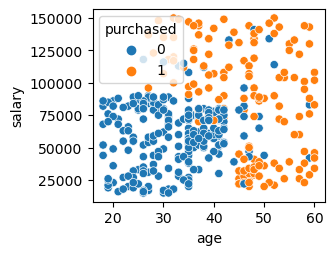

In [6]:
plt.figure(figsize=[3,2.5])
sns.scatterplot(data = df, x = 'age', y = 'salary',hue = 'purchased')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:xlabel='age', ylabel='salary'>

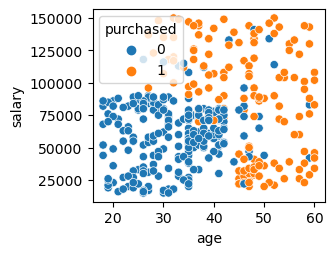

In [12]:
from sklearn.neighbors import KNeighborsClassifier #import ตัว learn มาสอน

df = pd.read_excel('customer.xlsx')

x = df[['age','salary']] #x = att.
y = df['purchased'] #y = class/label

model = KNeighborsClassifier(n_neighbors=3) #กลุ่มของ att. = 3

model.fit(x,y)#สอน model

model.score(x,y) #ค่าความแม่นยำ 0.89 = 89%

plt.figure(figsize=[3,2.5])
sns.scatterplot(data = df, x = x['age'], y = x['salary'],hue = y)


[1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


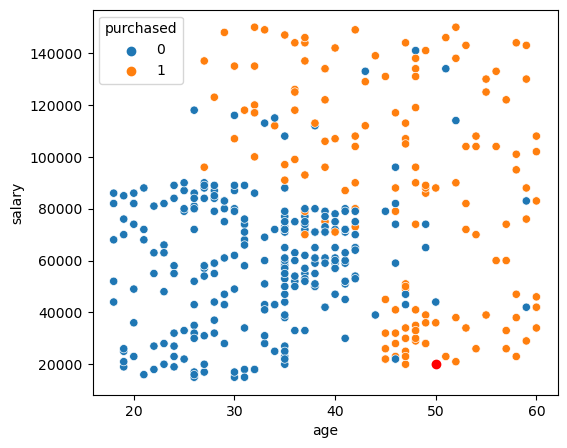

In [22]:
print(model.predict([[50,20000]])) #ทำนาย /array [1] = purchased
plt.figure(figsize=[6,5])
sns.scatterplot(data = df, x = x['age'], y = x['salary'],hue = y)
plt.scatter( x = 50, y = 20000, c = 'r')#plot จุดเดียว

In [29]:
#แบ่งข้อมูล train and test 80/20
from sklearn.neighbors import KNeighborsClassifier #import ตัว learn มาสอน
from sklearn.model_selection import train_test_split

df = pd.read_excel('customer.xlsx')

x = df[['age','salary']] #x = att.
y = df['purchased'] #y = class/label

x_train, x_test, y_train, y_test = train_test_split(x,y
                                                    ,train_size = 0.8
                                                   ,random_state = 0)

model = KNeighborsClassifier(n_neighbors = 3) #กลุ่มของ att. = 3 /n_neighbors = ดูจำนวนตัวใกล้

model.fit(x_train,y_train)#สอน model

model.score(x_test,y_test) *100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


78.75

In [34]:
model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
y_test #เทียบกับ x_test ที่เป็นตัวทำนาย y_test(คำตอบ)

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: purchased, Length: 80, dtype: int64

In [36]:
df2 = pd.DataFrame(data = y_test)#สร้าง dataframe เพื่อเทียบ

In [37]:
df2['Predict'] = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
print(df2.to_string()) #เทียบกันใน dataframe

     purchased  Predict
132          0        0
309          0        0
341          0        0
196          0        0
246          0        0
60           0        1
155          0        0
261          1        1
141          0        0
214          0        0
37           0        0
134          0        0
113          0        0
348          0        0
12           0        0
59           0        1
293          0        0
140          0        0
206          1        1
199          0        0
176          0        0
268          1        1
124          0        0
344          1        1
175          0        0
313          1        1
78           0        0
15           0        0
286          0        0
102          0        0
170          0        1
303          1        0
334          1        0
225          0        0
65           0        0
76           0        0
90           0        0
173          0        0
179          0        1
399          1        1
100          0  

In [43]:
#Scaler ปรับค่าให้อยู่ใน len เดียวกัน ใช้เพื่อให้แม่นยำขึ้นมากๆ
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('customer.xlsx')

x = df[['age','salary']] #x = att.
y = df['purchased'] #y = class/label

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y
                                                    ,train_size = 0.8
                                                   ,random_state = 0)

model = KNeighborsClassifier(n_neighbors = 3) 
model.fit(x_train,y_train)
model.score(x_test,y_test) *100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


95.0

[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


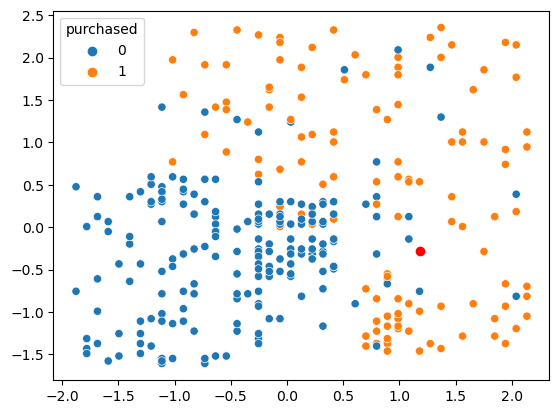

In [47]:
x_scaler = scaler.transform([[50,60000]])
print(model.predict(x_scaler))
sns.scatterplot( x = x_train[:,0], y = x_train[:,1] , hue = y_train)
plt.scatter(x = x_scaler[0,0],y = x_scaler[0,1],c = 'r')

In [51]:
df = pd.read_excel('umbrellas_sold_1.xlsx')

In [52]:
df

,month,rainfall_mm,umbrellas_sold
0,Jan,82.0,15
1,Feb,92.5,25
2,Mar,83.2,17
3,Apr,97.7,28
4,May,131.9,41
5,Jun,141.3,47
6,Jul,165.4,50
7,Aug,140.0,46
8,Sep,126.7,37
9,Oct,97.8,22


[34.92604939]


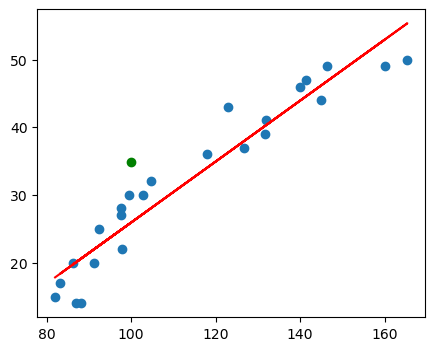

In [61]:
from sklearn.linear_model import LinearRegression
df = pd.read_excel('umbrellas_sold_1.xlsx')

x = df['rainfall_mm']
y = df['umbrellas_sold']

model = LinearRegression()
#ก่อน fit ต้องแปลงมิติก่อนเพราะเป็น1มิติ
x = np.array(x).reshape(-1,1)
model.fit(x,y)

plt.figure(figsize=[5,4])
plt.scatter(x,y)

#ตีเส้น regression y = a + bx
#วิธีที่1
a = model.intercept_ #จุดตัด
b = model.coef_[0] #ความชัน
y2 = a+b*x
#วิธีที่2
y3 = model.predict(x)
plt.plot(x,y2,'r')

print(model.predict([[120]]))#ขายร่มได้ =
plt.scatter(x = 100,y = model.predict([[120]]),c='g')

In [72]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('co2-emission.csv')

x = df[['volume','weight']]
y = df['co2']

model = LinearRegression()

model.fit(x,y)
#plot ไม่ได้เพราะแกน x มีหลายมิติ แต่ถ้าจะ plot plot ได้ 1 ตัว
#วิธีที่2
y3 = model.predict(x)

print(model.predict([[1000,1000]]))

print(model.score(x,y))

[95.05092409]
0.3765564043619989


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
df

,car,model,volume,weight,co2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99
